# Analysis of the data

In [1]:
# Import moduls
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Import functions
from core.preprocessing import decoding_numbers
from core.load_data import load_data, initalize_result_df

Load the data.

In [2]:
# Read file
path = '../data/raw/2011 Census Microdata Teaching File.csv'
df = pd.read_csv(path, skiprows= 1)
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


Shape of the dataframe.

In [3]:
print(df.shape)

(569741, 18)


Columns in the dataframe.

In [4]:
df.iloc[0,:].values.tolist()
df.columns.values 

array(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry',
       'Hours worked per week', 'Approximated Social Grade'], dtype=object)

Information about datatypes and missing values in the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569741 entries, 0 to 569740
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Person ID                  569741 non-null  int64 
 1   Region                     569741 non-null  object
 2   Residence Type             569741 non-null  object
 3   Family Composition         569741 non-null  int64 
 4   Population Base            569741 non-null  int64 
 5   Sex                        569741 non-null  int64 
 6   Age                        569741 non-null  int64 
 7   Marital Status             569741 non-null  int64 
 8   Student                    569741 non-null  int64 
 9   Country of Birth           569741 non-null  int64 
 10  Health                     569741 non-null  int64 
 11  Ethnic Group               569741 non-null  int64 
 12  Religion                   569741 non-null  int64 
 13  Economic Activity          569741 non-null  

Decode the numbers in the dataframe according to the information given on the website.

In [3]:
df_decoded = decoding_numbers(df)
df_decoded.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,North East,Not communal,Married/same-sex civilpartnership couple family,Usual resident,Female,55 to 64,Married or in a registered same-sex civil part...,No,UK,Good health,White,Christian,Economically inactive: Retired,"Process, Plant and Machine Operatives",Mining and quarrying; Manufacturing; Electrici...,No code required,DE
1,7394745,North East,Not communal,Lone parent family (female head),Usual resident,Male,35 to 44,Single (never married or never registered a sa...,No,UK,Very good health,White,Christian,Economically active: Employee,"Process, Plant and Machine Operatives",Transport and storage; Information and communi...,Full-time: 49 or more hours,C2
2,7395066,North East,Not communal,Cohabiting couple family,Usual resident,Female,35 to 44,Single (never married or never registered a sa...,No,UK,Very good health,White,No religion,Economically active: Employee,"Caring, Leisure and Other Service Occupations",Human health and social work activities,Full-time: 31 to 48 hours,DE
3,7395329,North East,Not communal,Cohabiting couple family,Usual resident,Female,16 to 24,Single (never married or never registered a sa...,No,UK,Good health,White,Christian,Economically active: Employee,Sales and Customer Service Occupations,Financial and insurance activities;Intermediation,Full-time: 31 to 48 hours,C1
4,7394712,North East,Not communal,Cohabiting couple family,Usual resident,Male,45 to 54,Divorced or formerly in a same-sex civil partn...,No,UK,Very good health,White,Christian,Economically active: Employee,"Managers, Directors and Senior Officials",Wholesale and retail trade; Repair of motor ve...,Full-time: 31 to 48 hours,C1


Generate an overview over the different columns and their values. 

In [6]:
def overview(df):
    """Generate an overview over the dataframe.
    
    VARs
        df: the dataframe
    RETURNS:
        None
    """
    
    df = df.copy()
    display(pd.DataFrame({'dtype': df.dtypes,
                          'total': df.count(),
                          'missing_n': df.isna().sum(),
                          'missing_%': df.isna().mean()*100,
                          'uniques_n': df.nunique(),
                          'uniques': [df[col].unique() for col in df.columns]
                         }))
overview(df)

,dtype,total,missing_n,missing_%,uniques_n,uniques
Person ID,int64,569741,0,0.0,569740,"[7394816, 7394745, 7395066, 7395329, 7394712, ..."
Region,object,569741,0,0.0,10,"[E12000001, E12000002, E12000003, E12000004, E..."
Residence Type,object,569741,0,0.0,2,"[H, C]"
Family Composition,int64,569741,0,0.0,7,"[2, 5, 3, 1, 6, -9, 4]"
Population Base,int64,569741,0,0.0,3,"[1, 2, 3]"
Sex,int64,569741,0,0.0,2,"[2, 1]"
Age,int64,569741,0,0.0,8,"[6, 4, 2, 5, 1, 7, 3, 8]"
Marital Status,int64,569741,0,0.0,5,"[2, 1, 4, 3, 5]"
Student,int64,569741,0,0.0,2,"[2, 1]"
Country of Birth,int64,569741,0,0.0,3,"[1, 2, -9]"


In [ ]:
overview(df_decoded)

Test for duplicates. 


In [ ]:
print(f'Duplicates: {df_decoded.duplicated().sum()}')

### Distribution of target

Distribution of the approximated social grade in the complete dataset.

Approximated Social Grade
C1                  159642
No code required    124103
DE                  123740
AB                   82320
C2                   79936
Name: count, dtype: int64


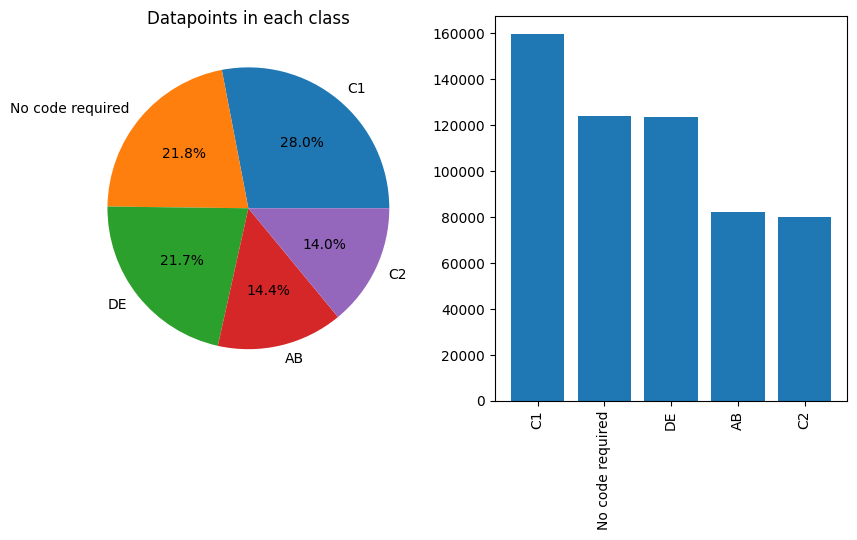

In [13]:
print(df_decoded['Approximated Social Grade'].value_counts())
fig_pie, ax_pie = plt.subplots(nrows=1, ncols=2, figsize=(10,5));
ax_pie[0].pie(x=df_decoded['Approximated Social Grade'].value_counts().values, 
                        labels=df_decoded['Approximated Social Grade'].value_counts().index, 
           radius=1, autopct='%1.1f%%')
ax_pie[0].set_title('Datapoints in each class')
ax_pie[1].bar(x=df_decoded['Approximated Social Grade'].value_counts().index, 
                    height=df_decoded['Approximated Social Grade'].value_counts().values)
ax_pie[1].tick_params('x', rotation = 90)

Create diagrams for the distribution of the target value (approximated social grade) in the values of the different columns.

In [7]:
def distribution_of_column(df, col_given):
    """Group by a column and calculate the target distribution."""
    df_new = df.loc[df['Approximated Social Grade']=='DE',:].groupby(col_given)[['Person ID']].agg('count')
    df_new.columns = ['DE']
    for col in ['C2', 'C1', 'No code required', 'AB']:
        df_new[col]= df.loc[df['Approximated Social Grade']== col,:].groupby(col_given)[['Person ID']].agg('count')
    df_new['Count']=df_new['DE']+df_new['C1']+df_new['C2']+df_new['AB']+df_new['No code required']
    for col in ['DE', 'C2', 'C1', 'No code required', 'AB']:
        df_new[col + '_perc']=df_new[col]/df_new['Count']
    return df_new

In [18]:
def plot_parts(df, col_given):
    """Plot the absolute and relative distribution of the target in the given column"""
    df_new = distribution_of_column(df, col_given)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    bottom = np.full(df_new.shape[0], 0)
    bottom_perc = np.full(df_new.shape[0], 0)
    for col in ['DE', 'C2', 'C1', 'No code required', 'AB']:
        ax[0].bar(x = df_new.index, height = df_new[col].values, bottom=bottom, width = 0.8)
        bottom = bottom + df_new[col].values
        ax[0].set_title('Absolute distirbution in ' + col_given)
        ax[0].legend(['DE', 'C2', 'C1', 'No code required', 'AB'])
        ax[0].tick_params('x', rotation = 90)
        ax[1].bar(x = df_new.index, height = df_new[col + '_perc'].values, bottom=bottom_perc, width = 0.8)
        bottom_perc = bottom_perc + df_new[col+ '_perc'].values
        ax[1].set_title('Relative distribution in ' + col_given)
        ax[1].legend(['DE', 'C2', 'C1', 'No code required', 'AB'])
        if col_given in ['Region', 'Family Composition', 'Age', 'Marital Status', 'Health', 
                         'Ethnic Group', 'Religion', 'Economic Activity', 'Occupation', 
                         'Industry', 'Hours worked per week']:
            ax[0].tick_params('x', rotation = 90)
            ax[1].tick_params('x', rotation = 90)
        else:
            ax[0].tick_params('x', rotation = 0)
            ax[1].tick_params('x', rotation = 0)
    return df_new

Create plots for all columns.

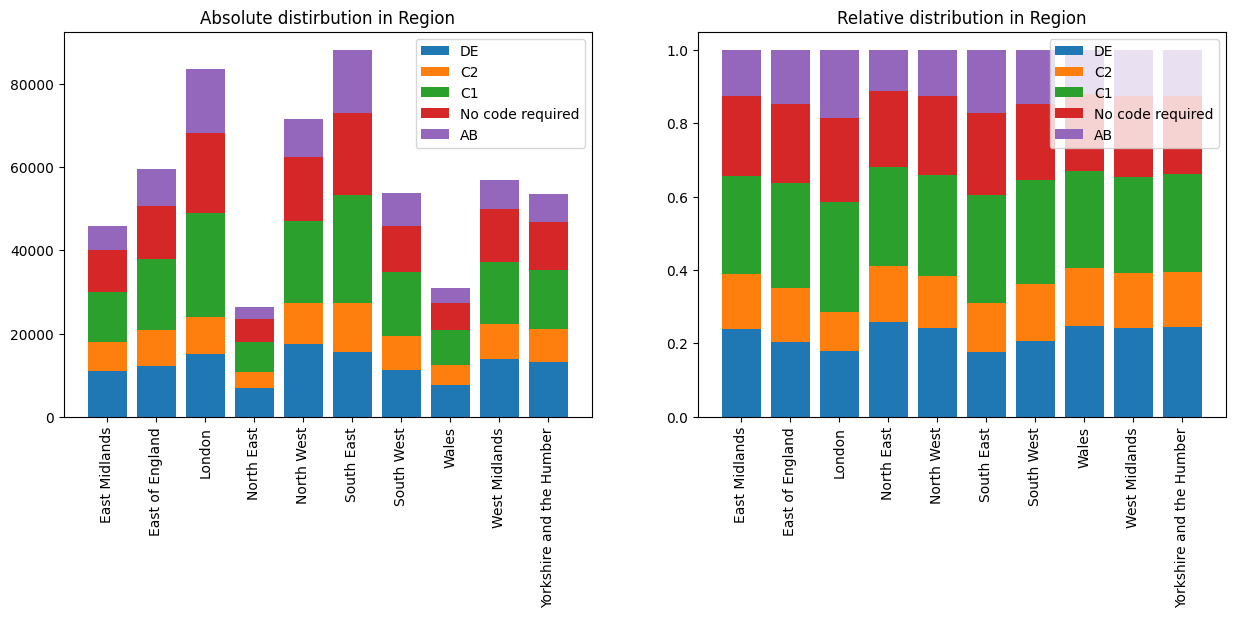

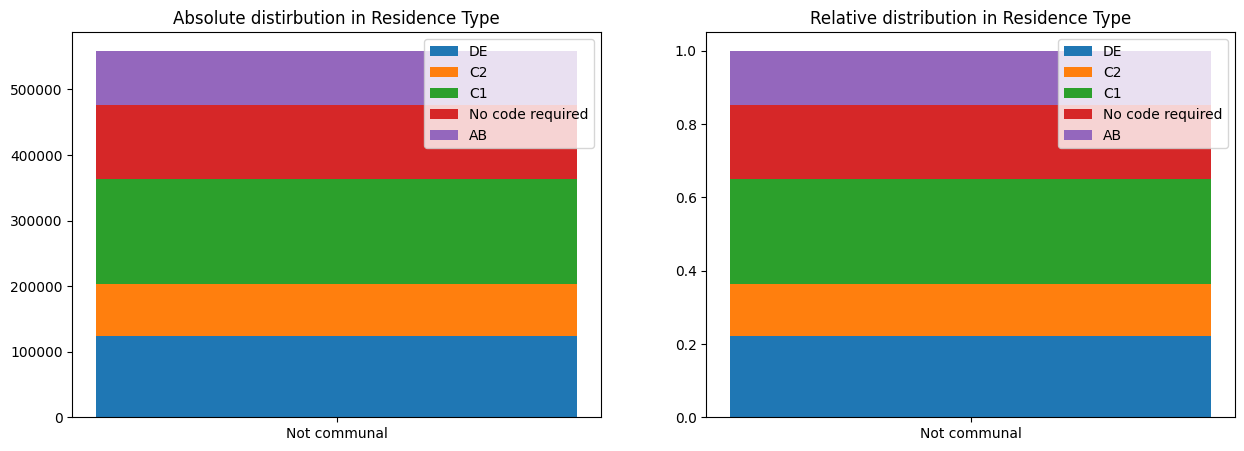

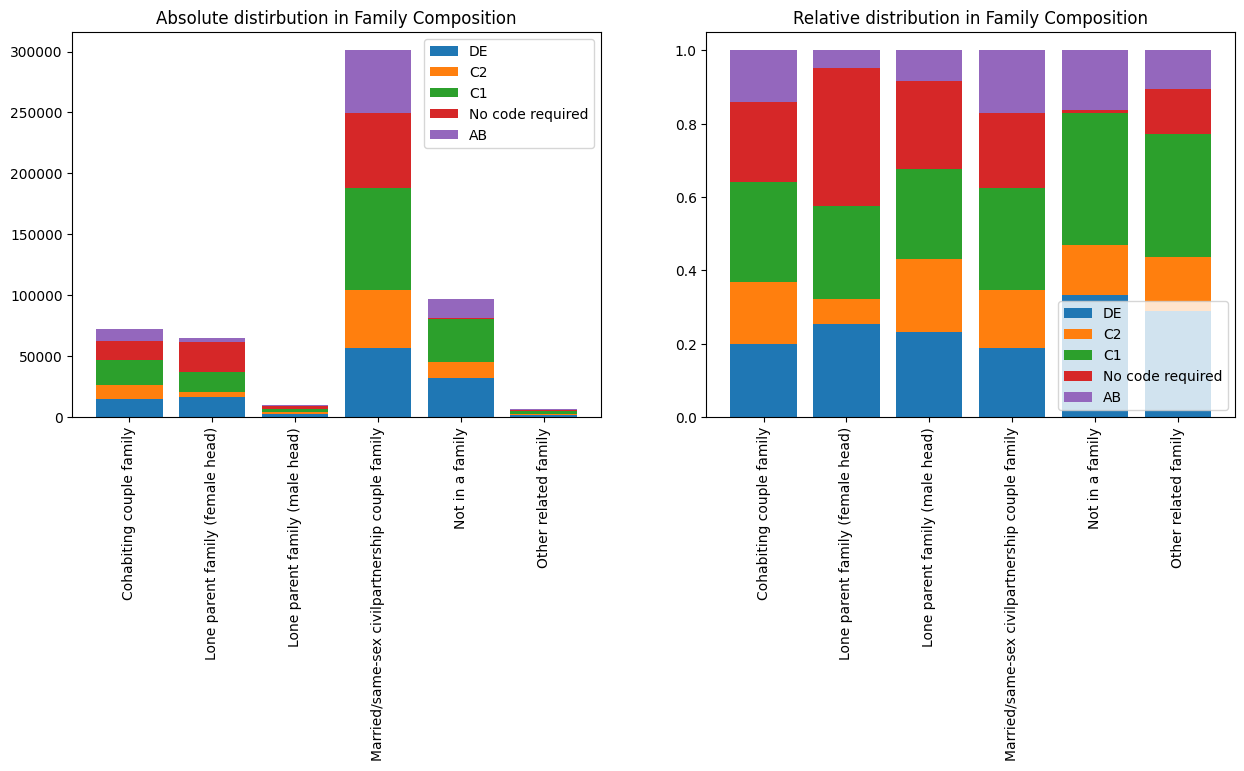

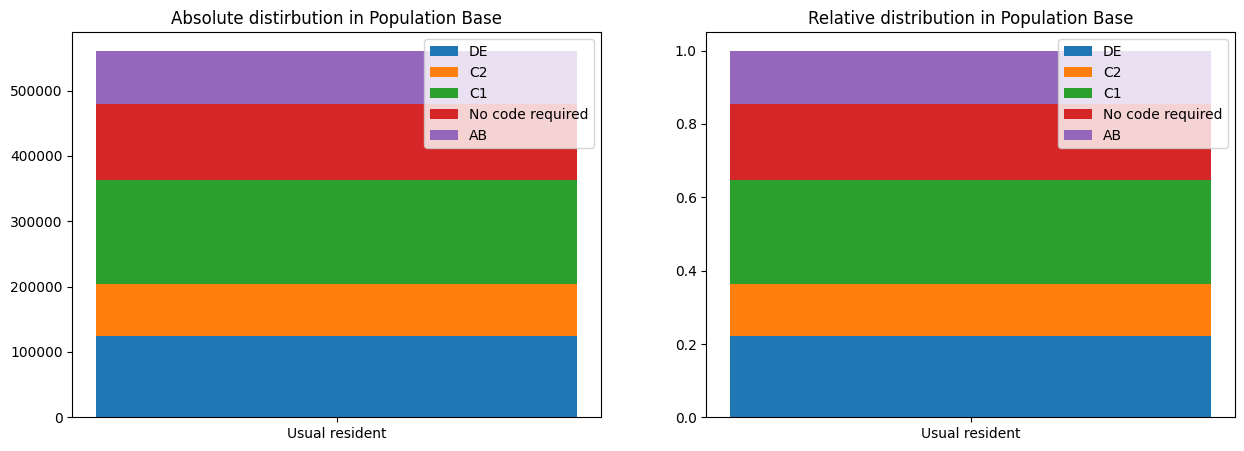

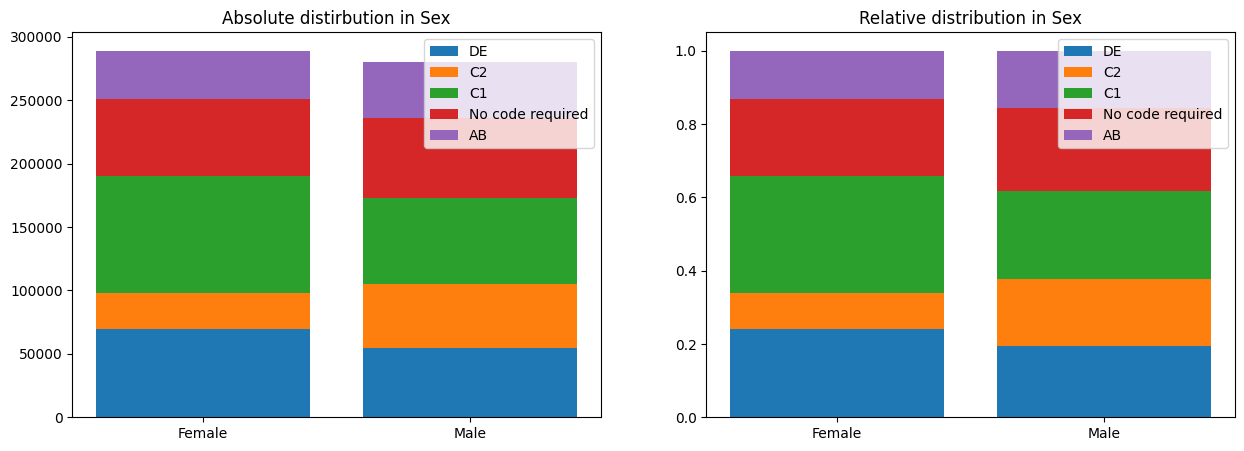

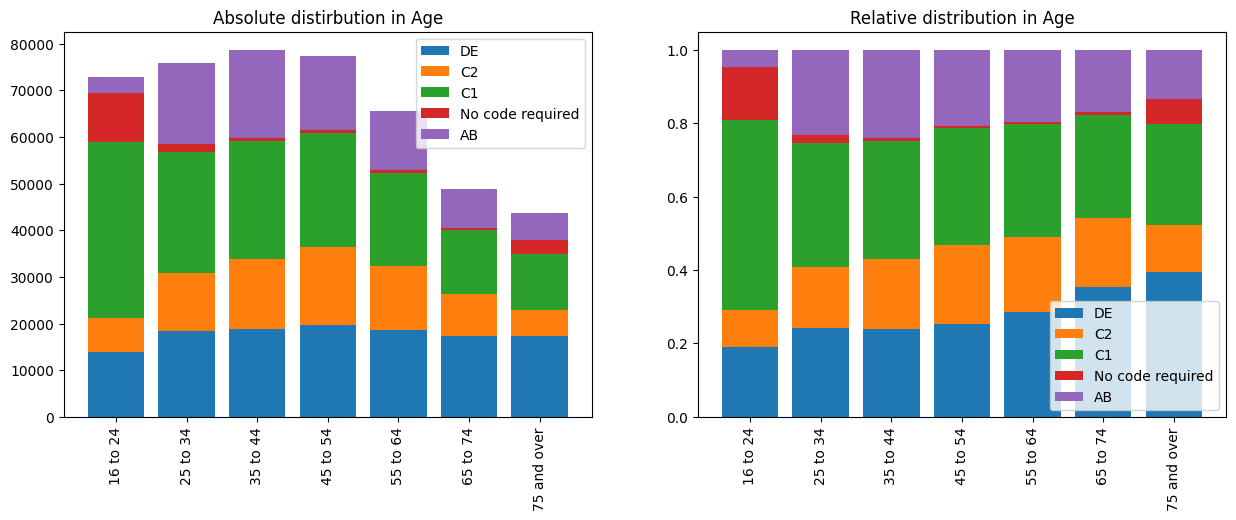

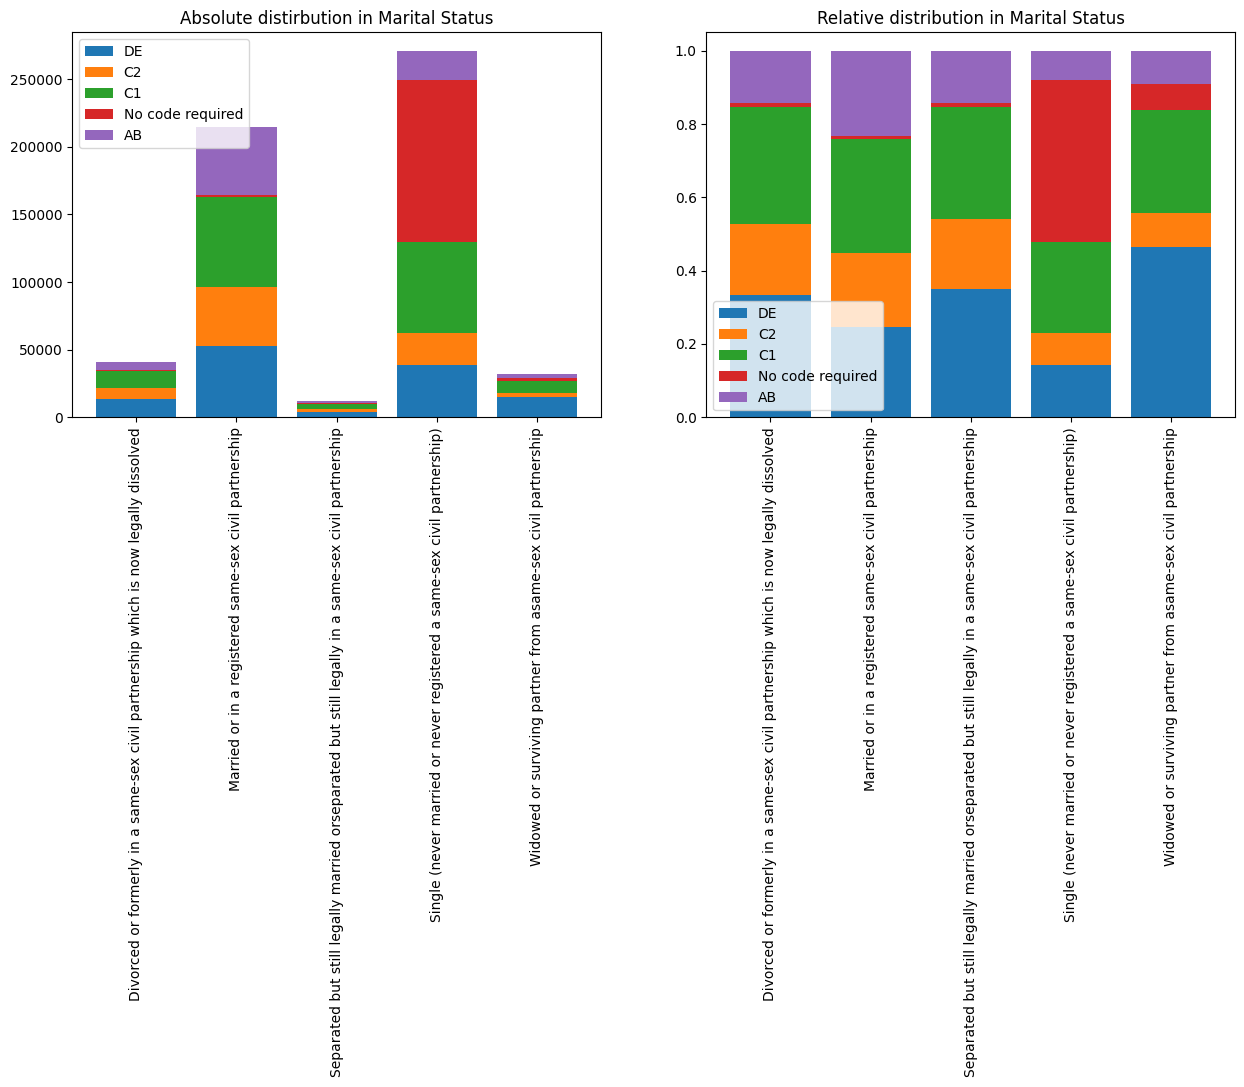

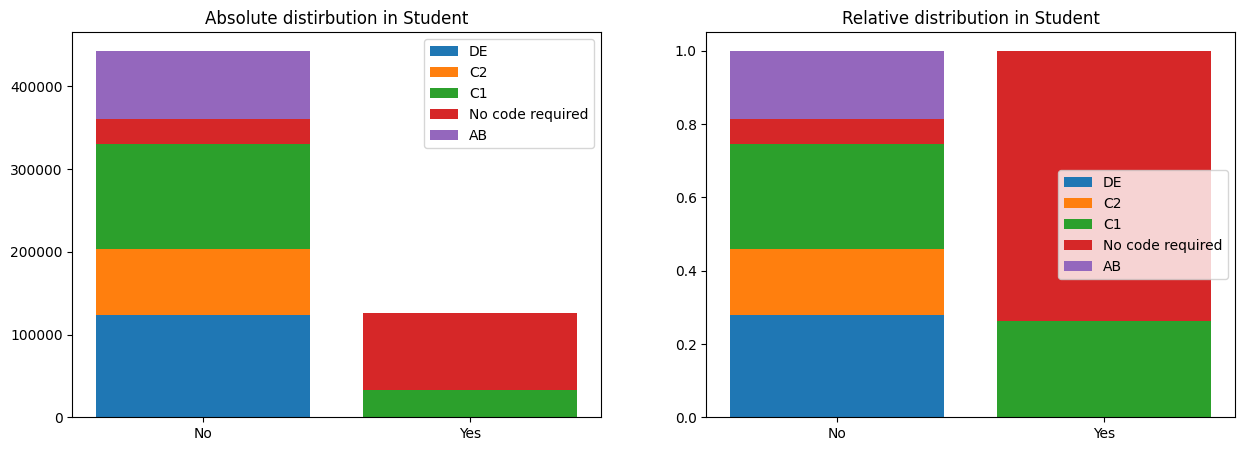

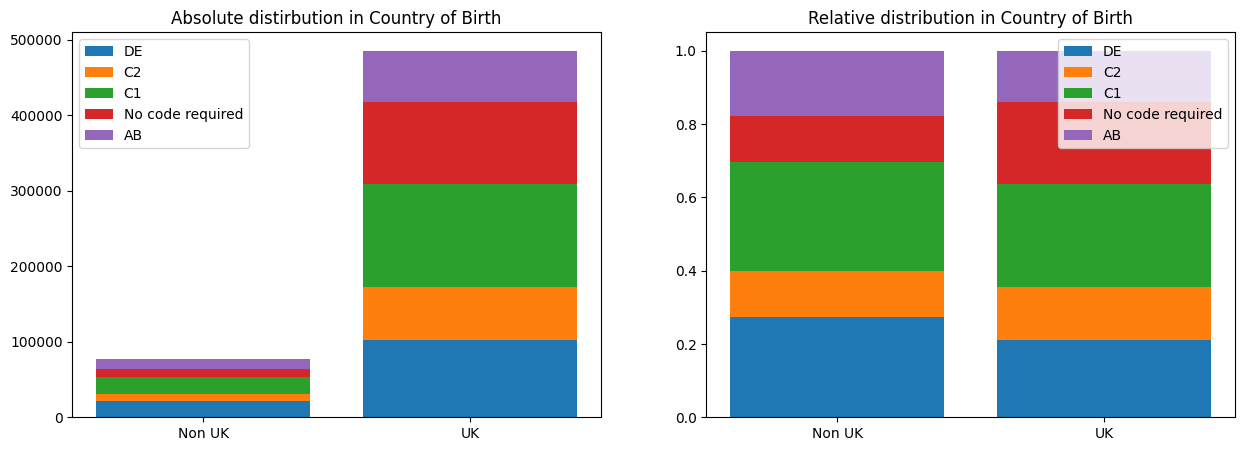

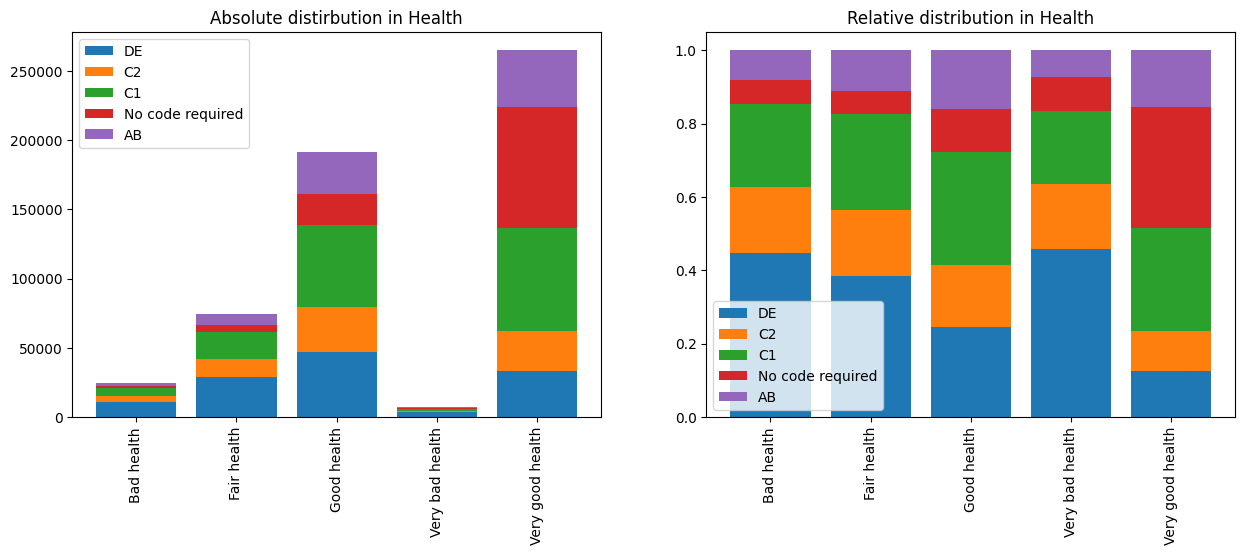

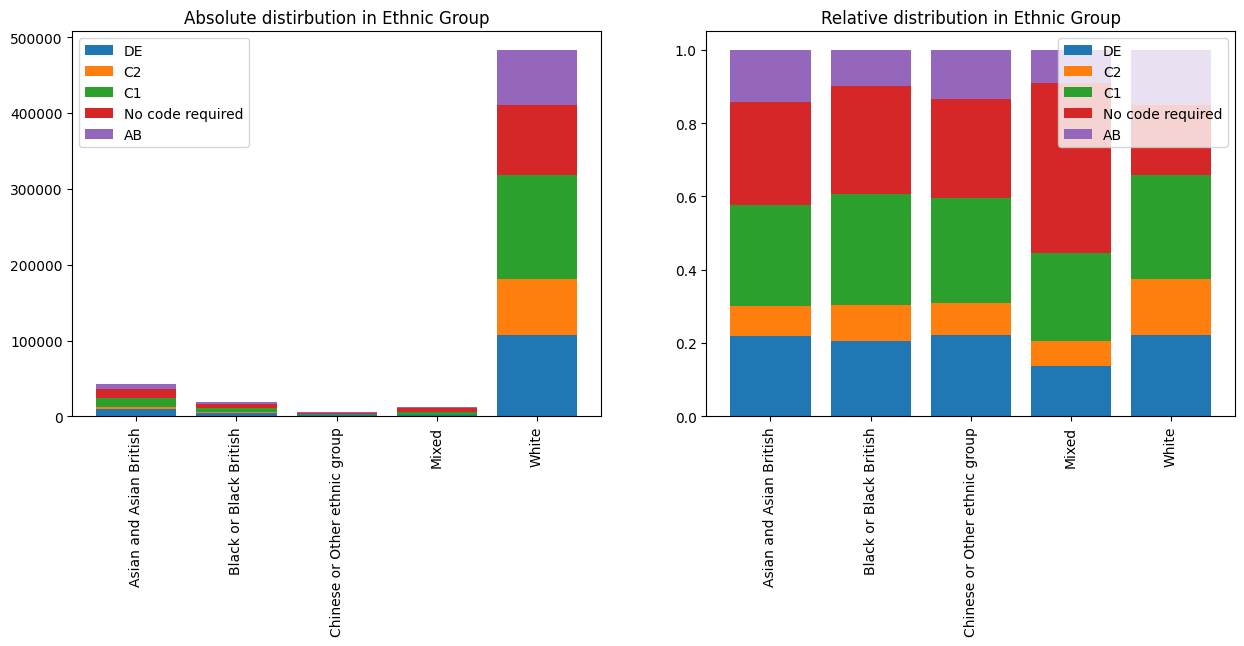

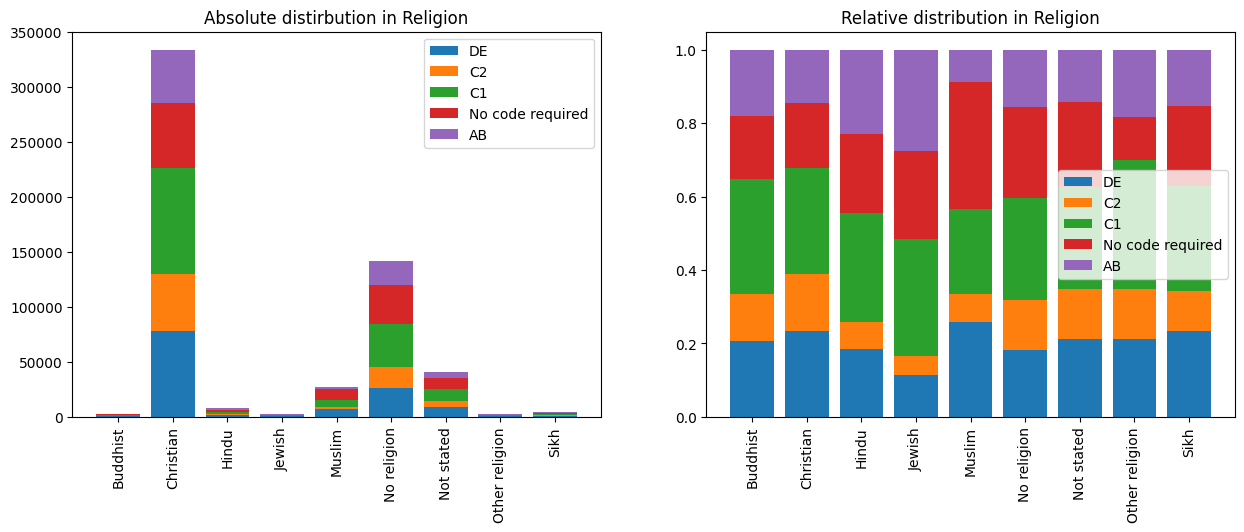

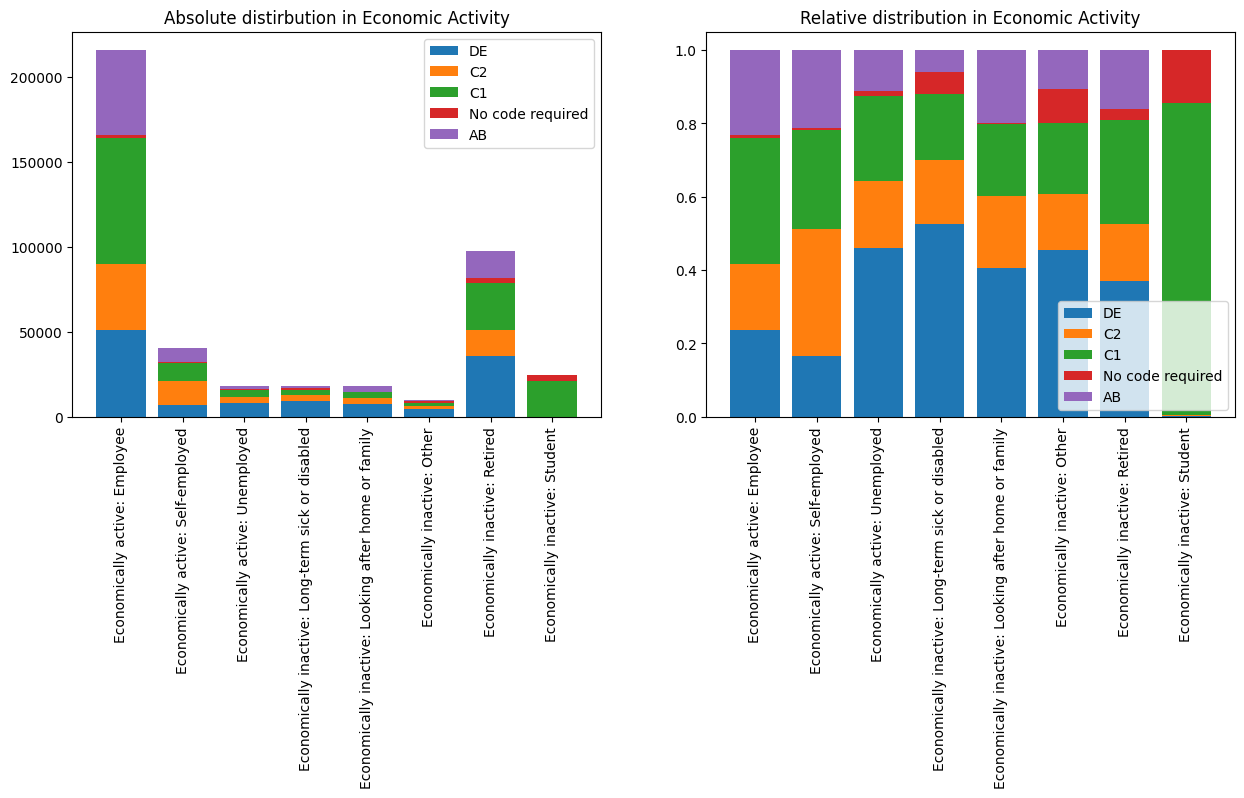

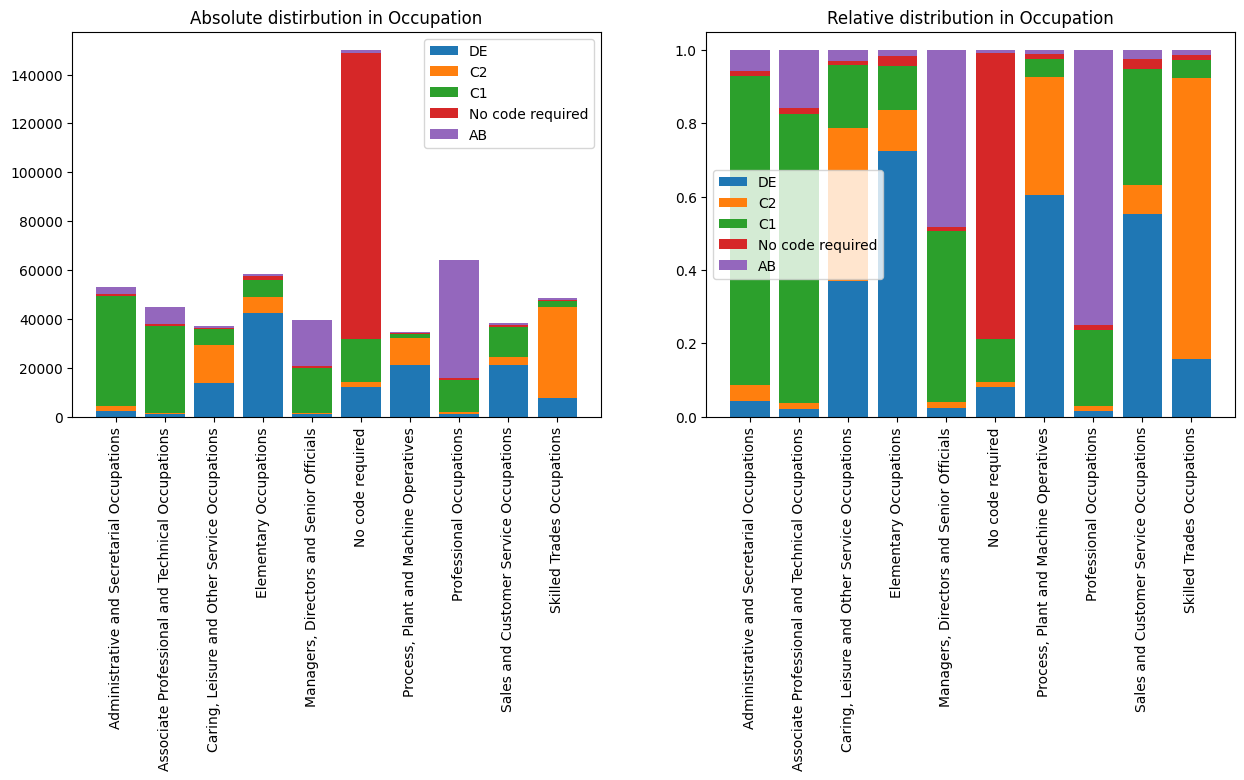

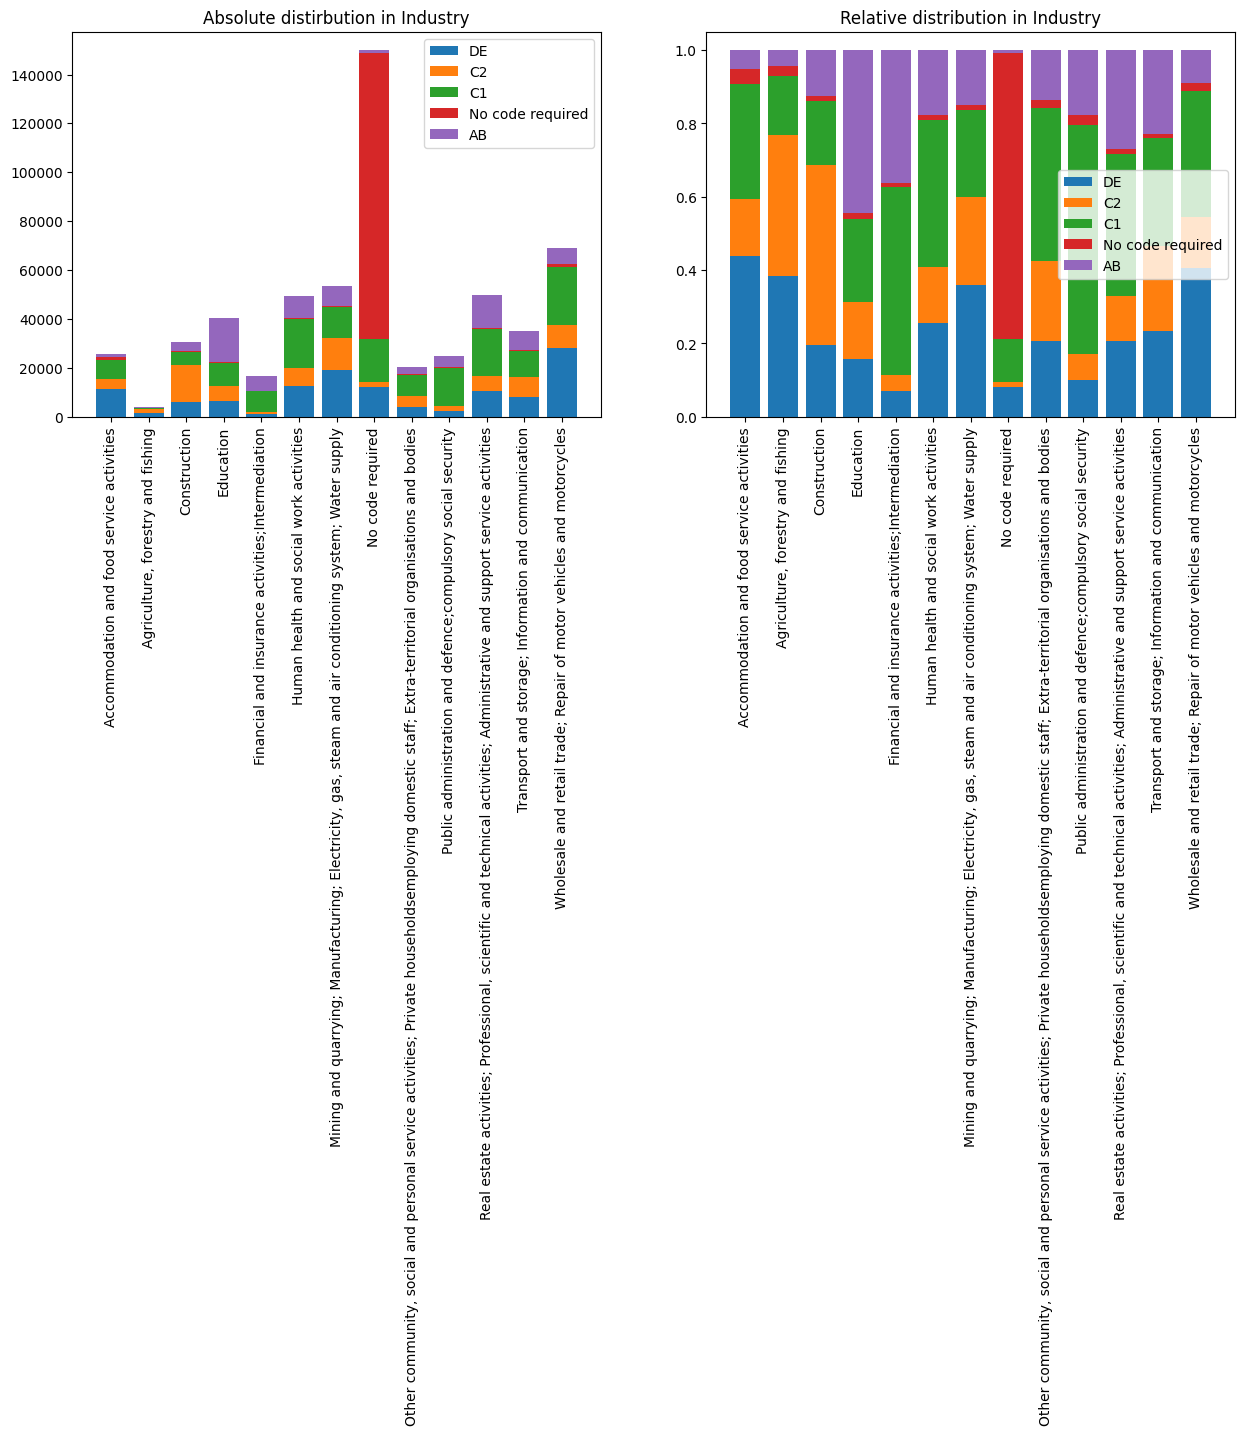

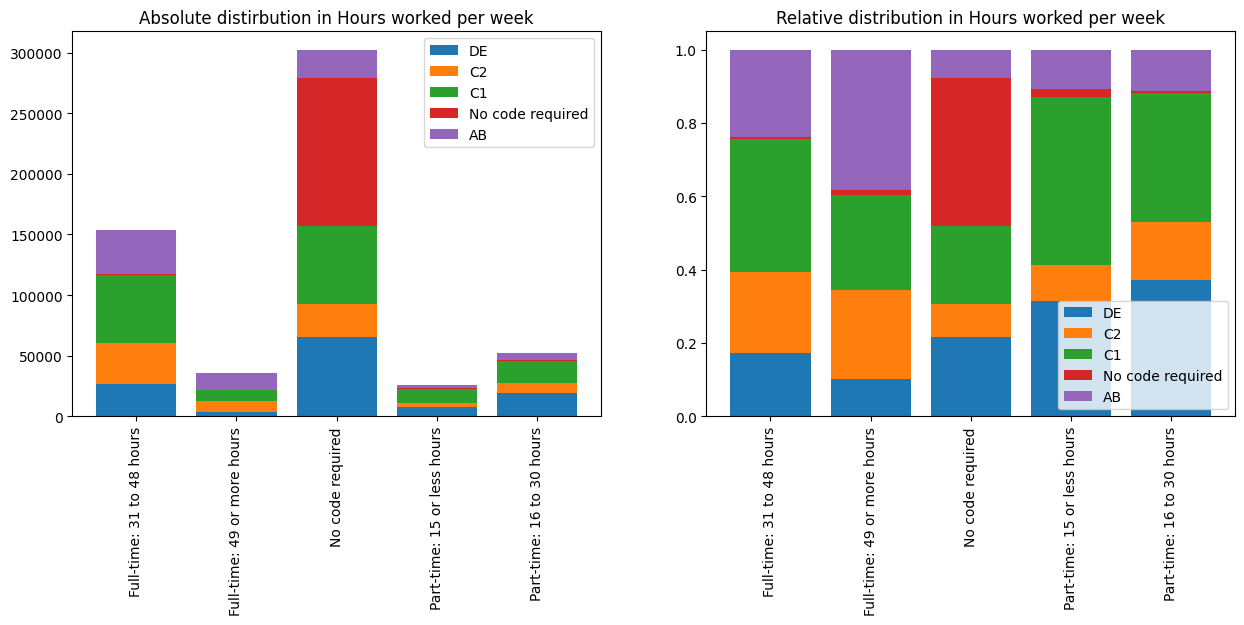

In [19]:
for col in ['Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry',
       'Hours worked per week']:
    plot_parts(df_decoded, col)